In [ ]:
import numpy as np
import pandas as pd 
dataset = 'https://raw.githubusercontent.com/shrutihegde98/Project636/main/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(dataset)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


y = data['DEATH_EVENT']
X = data.drop(['DEATH_EVENT','time'], axis=1)
# Stratify the data because X is unbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100,stratify=y.values)

# Here we only select feature #4 and #7 based on medical knowledge from doctor in medical field
index=[4,7]
top_name=X.columns[index]
X_train = X_train[top_name]
X_test = X_test[top_name]
# X_train = np.array(X_train)
#list for comparing different models
accuracy_list=[]

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

RF_reg = RandomForestClassifier(random_state=100)
grid = {"max_features" : ["auto", "sqrt",'log2', None],
        "max_depth": [1,10,15,20,50,100,1000]}
RF_reg_cv = GridSearchCV(RF_reg, grid, cv=3)
RF_reg_cv.fit(X_train,y_train)
print("Tuned hyperparameter n_estimators: {}".format(RF_reg_cv.best_params_)) 
print("Best score: {}".format(RF_reg_cv.best_score_))
print("Best Estimator: {}".format(RF_reg_cv.best_estimator_))

RF_model = RF_reg_cv.best_estimator_.fit(X_train,y_train)
#cross validation
cv_results = cross_val_score(RF_model, X_test, y_test, cv=10)
print("Prediction using RF: cross validation: ",np.mean(cv_results))
#accuracy using best parameter
RF_prediction = RF_model.predict(X_test)
print("Prediction using random forest: accuracy: ", accuracy_score(y_test, RF_prediction))
RF_accuracy = accuracy_score(y_test, RF_prediction)
accuracy_list.append(RF_accuracy)

Tuned hyperparameter n_estimators: {'max_depth': 10, 'max_features': None}
Best score: 0.7509316770186336
Best Estimator: RandomForestClassifier(max_depth=10, max_features=None, random_state=100)
Prediction using RF: cross validation:  0.6888888888888889
Prediction using random forest: accuracy:  0.7666666666666667


In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

# DF_reg = DecisionTreeClassifier(random_state=100,max_depth=10)
# grid = {"max_features" : ["auto", "sqrt",'log2', None]}
# DF_reg_cv = GridSearchCV(DF_reg, grid, cv=3)
# DF_reg_cv.fit(X_train,y_train)
# print("Tuned hyperparameter n_estimators: {}".format(DF_reg_cv.best_params_)) 
# print("Best score: {}".format(DF_reg_cv.best_score_))
# print("Best Estimator: {}".format(DF_reg_cv.best_estimator_))

# DF_model = DF_reg_cv.best_estimator_.fit(X_train,y_train)
# DF_prediction = DF_model.predict(X_test)
# #cross validation
# cv_results = cross_val_score(DF_model, X_test, y_test, cv=10)
# print("Prediction using Decision tree: cross validation: ",np.mean(cv_results))

# BF_model = BaggingClassifier(random_state=100).fit(X_train, y_train)
# BF_prediction = BF_model.predict(X_test)
# #cross validation
# cv_results = cross_val_score(BF_model, X_test, y_test, cv=10)
# print("Prediction using Bagging: cross validation: ",np.mean(cv_results))

# DF_score = accuracy_score(y_test, DF_prediction)
# BF_score = accuracy_score(y_test, BF_prediction)
# print("Accuracy score for bagging classifier:", BF_score)
# print("Accuracy score for decision tree classifier:", DF_score)


In [ ]:
 # Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

#Grid search
log_reg = LogisticRegression(random_state=100)
grid = {"C" : [0.1, 1,10,50,75,100,1000]}
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(X_train,y_train)
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))
print("Best Estimator: {}".format(log_reg_cv.best_estimator_))

logistic_model = log_reg_cv.best_estimator_.fit(X_train,y_train)
#cross validation
cv_results = cross_val_score(logistic_model, X_test, y_test, cv=10)
print("Prediction using logistic regression: cross validation: ",np.mean(cv_results))
#accuracy using best parameters
logistic_prediction = logistic_model.predict(X_test)
LogReg_accuracy=accuracy_score(y_test, logistic_prediction)
print("Prediction using logistic regression: accuracy: ",LogReg_accuracy )
accuracy_list.append(LogReg_accuracy)

Tuned hyperparameter n_estimators: {'C': 1}
Best score: 0.7463768115942028
Best Estimator: LogisticRegression(C=1, random_state=100)
Prediction using logistic regression: cross validation:  0.7555555555555556
Prediction using logistic regression: accuracy:  0.7555555555555555


In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 50, 75, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, cv=3)
# fitting the model for grid search
grid.fit(X_train, y_train)
# # print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
#print best score
print(grid.best_score_)

{'C': 50, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=50, gamma=1)
0.7513457556935818


In [ ]:
svm_model = grid.best_estimator_.fit(X_train,y_train)
svm_prediction = svm_model.predict(X_test)
#cross validation
cv_results = cross_val_score(svm_model, X_test, y_test, cv=10)
print("Prediction using SVM: cross validation: ",np.mean(cv_results))
#accuracy score for best parameters
SVM_accuracy=accuracy_score(y_test, svm_prediction)
print("Prediction using SVM: accuracy: ", SVM_accuracy)
accuracy_list.append(SVM_accuracy)

Prediction using SVM: cross validation:  0.7444444444444445
Prediction using SVM: accuracy:  0.7444444444444445


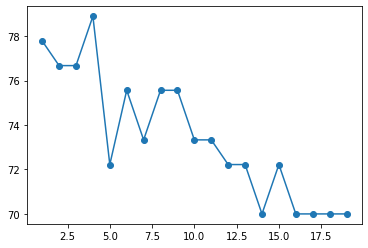

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn_list = []
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_prediction = knn_model.predict(X_test)
    knn_accuracy = (round(accuracy_score(knn_prediction, y_test), 4) * 100)
    knn_list.append(knn_accuracy)
k = np.arange(1,20)
plt.plot(k, knn_list,'-o')

In [ ]:
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)
#cross validation
cv_results = cross_val_score(knn_model, X_train, y_train, cv=10)
print("Prediction using KNN: cross validation: ",np.mean(cv_results))
#accuracy score for best parameter
KNN_accuracy=accuracy_score(y_test, knn_prediction)
print("Prediction using KNN: accuracy: ",KNN_accuracy )
accuracy_list.append(KNN_accuracy)

Prediction using KNN: cross validation:  0.7414285714285714
Prediction using KNN: accuracy:  0.7333333333333333


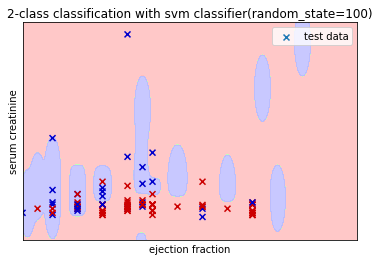

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X_train = np.array(X_train)
X_test = np.array(X_test)

cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
cmap_test = ListedColormap(['g', 'y', 'k'])

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = svm_model

fig, ax = plt.subplots()
# title for the plots
title = ('2-class classification with svm classifier(random_state=100)')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
X2, X3 = X_test[:,0], X_test[:,1]
xx1, yy1 = make_meshgrid(X3, X3)

plot_contours(ax, clf, xx, yy, cmap=cmap_light, alpha=0.8)
# ax.scatter(X0, X1, c=y_train, cmap=cmap_bold, label='training data')
ax.scatter(X2, X3, c=y_test, marker='x', cmap=cmap_bold, label='test data')
ax.set_ylabel('serum creatinine')
ax.set_xlabel('ejection fraction')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

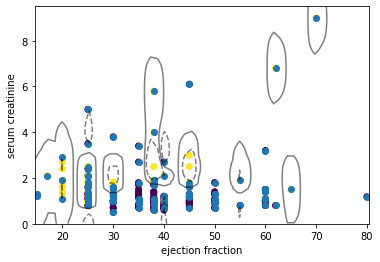

In [18]:
xx = np.linspace(X_train[:,0].min()-0.5, X_train[:,0].max()+0.5, 50)
yy = np.linspace(X_train[:,1].min()-0.5, X_train[:,1].max()+0.5, 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
# Plot decision boundary and margins
Z = svm_model.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, label='training data');
plt.ylabel('serum creatinine')
plt.xlabel('ejection fraction')
support_vectors = svm_model.support_vectors_
plt.scatter(support_vectors[:,0], support_vectors[:,1])
plt.show()

In [ ]:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(knn_model, X_test, y_test)


In [ ]:
# !pip install dtreeviz

In [ ]:
# from dtreeviz.trees import dtreeviz


# viz = dtreeviz(RF_model.estimators_[10], X_train, y_train,
#                target_name="train data",
#                feature_names=top_name,
#                title="10th decision tree in our random forest")

# viz.save("decision_tree_with_train_data.svg")
# # from google.colab import files
# # files.download("decision_tree_with_train_data.svg")


In [ ]:
accuracy_list

[0.7666666666666667,
 0.7555555555555555,
 0.7444444444444445,
 0.7333333333333333]

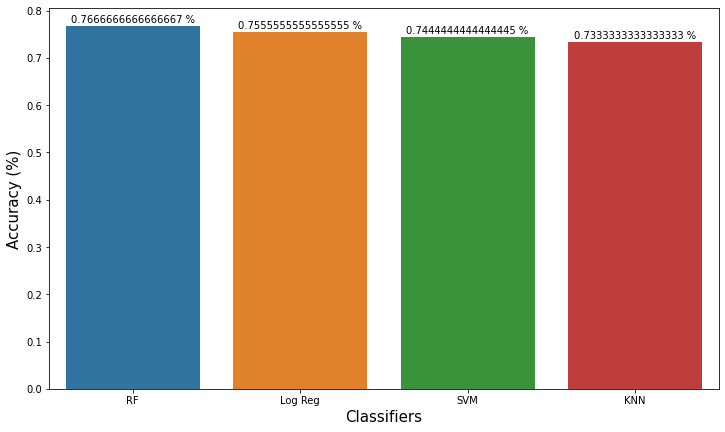

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,7))
models=["RF","Log Reg", "SVM", "KNN"]
ax = sns.barplot(x=models, y=accuracy_list)
plt.xlabel("Classifiers", fontsize=15)
plt.ylabel("Accuracy (%)", fontsize=15)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x()
    y = p.get_y()
    ax.annotate(f"{height} %", (x + width/2, y+ height*1.01), ha="center")
plt.show()

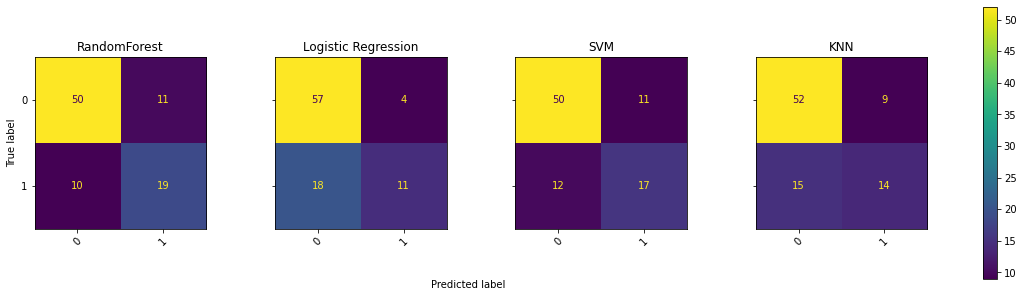

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifiers = {
    "RandomForest" : RF_model,
    "Logistic Regression" : log_reg,
    "SVM" : svm_model,
    "KNN": knn_model
}

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix) #data.target_names) 
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()
